This tutorial follows 

https://github.com/The-Singularity-Research/TensorNetwork-Tutorial

which is based on the TensorNetwork documentation

https://tensornetwork.readthedocs.io/en/latest/tutorial.html

In [1]:
!pip install tensornetwork jax jaxlib

In [2]:
import numpy as np
import jax
import tensornetwork as tn

## Nodes and edges

Nodes represent the tensor in the network. Axes correspond to edges. A rank 2-tensor can be graphically represented by a node with two "dangling" edges (unconnected edges)

$ -\bullet - \ \ = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

In [3]:
node = tn.Node(np.eye(2))
print(node.tensor) # This is how you access the underlying tensor.

[[1. 0.]
 [0. 1.]]


In [4]:
print(node.edges) # The tensor contains two dangling edges

[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
]


In [5]:
# Create three rank 2-tensors a,b, and c
a = tn.Node(np.eye(2))
b = tn.Node(np.eye(2))
c = tn.Node(np.eye(2))
# Dangling edges are automatically created at node creation.
# We can access the edge a[1] in this way
a.get_edge(1)


Edge(Dangling Edge)[1] 

Let us create a standard edge by connecting two dangling edges. We call them "standard edges". Below we create a connected edge between the two nodes for $a$ and $b$ by connecting $a[0]$ and $b[0]$:

$-\bullet - \bullet -$

In [6]:
a[0] ^ b[0] # Standard edge. Same as tn.connect(a[0], b[0])


Edge('__unnamed_node__'[0] -> '__unnamed_node__'[0] )

A third type of edge is a trace edge. They connect a node to itself. Operationally, this corresponds to take the trace of the matrix formed by two associated axes. For example, let us create a node with a loop by connecting the two edges $c[0]$ and $c[1]$ of the tensor node $c$

In [7]:
c[0] ^ c[1] # Trace edge. Connect a node to itself


Edge('__unnamed_node__'[0] -> '__unnamed_node__'[1] )

## Inner product (contraction)

Each vector is represented as a node with one "dangling" edge

$ a = \begin{pmatrix} 1. \\ 2. \\ 3. \end{pmatrix}\ \  = \quad \bullet- \quad$
$ b = \begin{pmatrix} 4. \\ 5. \\ 6. \end{pmatrix}\ \  = \quad \bullet- \quad$

Connecting the dangling edge of the vectors $\mathbf{a}$ and $\mathbf{b}$ gives an inner product when the edge is contracted.

$ c = \langle a, b \rangle = \sum_{i = 0}^2 a_ib_i = 1\cdot 4 +2\cdot 4 + 3\cdot 6 = 32$

In [8]:
# Either tensorflow tensors or numpy arrays are fine.
a = tn.Node(np.array([1., 2., 3.]))
b = tn.Node(np.array([4., 5., 6.]))

edge1 = a[0] ^ b[0] # = tn.connect(a[0], c[0])

c = tn.contract(edge1) # In this case, contraction gives inner product
# You can access the underlying tensor of the node via `node.tensor`
print("a = " + str(a.tensor))
print("b = " + str(b.tensor))

print("Contraction = " + str(c.tensor))

a = [1. 2. 3.]
b = [4. 5. 6.]
Contraction = 32.0


## Visualization using Networkx

https://networkx.github.io/

In [9]:
!pip install networkx

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

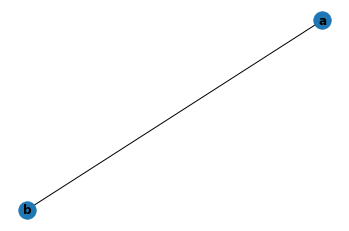

In [14]:
G = nx.Graph()
G.add_nodes_from(["a", "b"])
G.add_edge("a", "b")

plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## More general contractions

In [15]:
# Create a 2x3x2 array
T = np.array( [ [[1,2],[3,4],[5,6]] , [[1,2],[3,4],[5,6]] ]) 
T.shape

(2, 3, 2)

The tensor $T_{i,j,k}$ is a rank $3$ tensor represented as a $2 \times 3 \times 2$ numpy array: 

$T = \begin{pmatrix} \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix} \\ \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix}  \end{pmatrix}$

The indices $i$ and $k$ range over the index set $\{1,2\}$, and the index $j$ ranges over $\{1,2,3\}$. The tensor $T$ can be represented as a node with three dangling edges $T[0], T[1],$ and $T[2]$. The edge $T[1]$ correspnds to the index $j$ and can be connected to a dangling edge of the vector

$U = \begin{pmatrix}1 \\ 1 \\ 1 \end{pmatrix}$

Connecting the dangling edge of $\mathbf{U}$ to the dangling edge of $T$ gives a contraction:

$ \sum_{j = 0}^2 T_{i,j,k}U_j = \quad \begin{pmatrix} 9 & 12 \\ 9 & 12 \end{pmatrix}$

In [18]:
T = tn.Node(T) # three edge tensor node

U = tn.Node(np.ones(3)) # 3-dimensional vector

edge = U[0] ^ T[1] # connect edge of U to edge T[1] of T

# Inner product sums along the 3 indices of T[1] and u[0]
# This gives a 2-by-2 matrix S by contracting the edge T[0]
S = tn.contract(edge) 

print("U :")
print(U.tensor)
print("-------------------")
print("T :")
print(T.tensor)
print("-------------------")
print("S :")
print(S.tensor)

U :
[1. 1. 1.]
-------------------
T :
[[[1 2]
  [3 4]
  [5 6]]

 [[1 2]
  [3 4]
  [5 6]]]
-------------------
S :
[[ 9. 12.]
 [ 9. 12.]]


In [19]:
T = np.array( [ [[1,2],[3,4],[5,6]] , [[1,2],[3,4],[5,6]] ]) #2-by-3-by-2 array
T = tn.Node(T) # three edge tensor node

U = tn.Node(np.ones(3)) # 3-dimensional vector
V = tn.Node(np.ones(2)) # 3-dimensional vector
W = tn.Node(np.ones(2)) # 3-dimensional vector

edge1 = U[0] ^ T[1] # connect edge of U to edge T[1] of T
edge2 = V[0] ^ T[0] # connect edge of V to edge T[0] of T
edge3 = W[0] ^ T[2] # connect edge of W to edge T[2] of T

X = tn.contract(edge1)
Y = tn.contract(edge2)
Z = tn.contract(edge3)

print("U = " + str(U.tensor))
print("-------------------")
print("V = " + str(V.tensor))
print("-------------------")
print("W = " + str(W.tensor))
print("-------------------")
print("X = " + str(X.tensor))
print("-------------------")
print("Y = " + str(W.tensor))
print("-------------------")
print("Z = " + str(Z.tensor))

U = [1. 1. 1.]
-------------------
V = [1. 1.]
-------------------
W = [1. 1.]
-------------------
X = [[ 9. 12.]
 [ 9. 12.]]
-------------------
Y = [1. 1.]
-------------------
Z = 42.0


We can visualize the rank $3$-tensor $T$ with networkX (see below) as a node labeled $"T"$ with three edges. Connecting the three edges of $T$ to the dangling edges of the vectors $U,V,W$ gives us a graph with three contractible edges. The first contraction reduces the rank three tensor to a $2 \times 2$ matrix. The second contraction yields a two-dimensional vector. The final contraction yields a scalar

$X = \sum_{j = 0}^2 T_{i,j,k}U_j = \begin{pmatrix} 9 & 12 \\ 9 & 12 \end{pmatrix}$

$Y = \sum_{i = 0}^1 X_{i, k} V_i \ = \ \begin{pmatrix} 1 & 1\end{pmatrix}$

$Z = \sum_{k = 0}^1 Y_k W_k \ = \ 42$

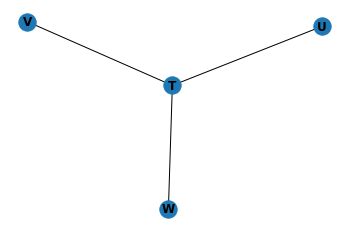

In [20]:
H = nx.Graph()
H.add_nodes_from(["T","U","V","W"])
H.add_edge("T", "U")
H.add_edge("T", "V")
H.add_edge("T", "W")

plt.plot()
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

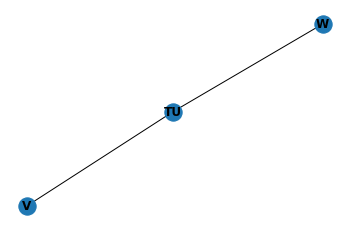

In [21]:
H = nx.Graph()
H.add_nodes_from(["TU","V","W"])
H.add_edge("TU", "V")
H.add_edge("TU", "W")

plt.plot()
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

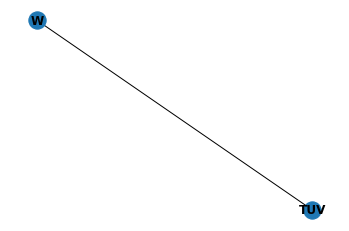

In [22]:
H = nx.Graph()
H.add_nodes_from(["TUV","W"])
H.add_edge("TUV", "W")

plt.plot()
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

## Trace operation 

In [23]:
# Creates a rank 2-tensor with dangling edges a[0] and a[1]
a = tn.Node(np.eye(2))

print("The type of a[0] is:", type(a[0]))
print("Is a[0] dangling?:", a[0].is_dangling())
print("Is a[1] dangling?:", a[1].is_dangling())

The type of a[0] is: <class 'tensornetwork.network_components.Edge'>
Is a[0] dangling?: True
Is a[1] dangling?: True


In [24]:
# Create an edge that connects the tensor a to itself
trace_edge = a[0] ^ a[1]

# Notice now that a[0] and a[1] are now the same edge
print("Is a[0] dangling?:", a[0].is_dangling())
print("Is a[1] dangling?:", a[1].is_dangling())
print("Are a[0] and a[1] the same edge?:", a[0] is a[1])

Is a[0] dangling?: False
Is a[1] dangling?: False
Are a[0] and a[1] the same edge?: True


## Optimized Contractions
At intermediate states of a computation, it’s very common for two nodes to have multiple edges connecting them. If only one of those edges is contracted, then all of the remaining edges become trace edges. This is usually very inefficient, as the new node will allocate significantly more memory than is ultimately required. Since trace edges only sum the diagonal of the underlying matrix, all of the other values calculated during the first contraction are useless. It is always more efficient to contract all of these edges simultaneously.

The methods contract_between or contract_parallel will do this for you automatically. You should see huge speedups when comparing these methods against contracting one edge at a time.

In [25]:
def one_edge_at_a_time(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  edge1 = node1[0] ^ node2[0]
  edge2 = node1[1] ^ node2[1]
  tn.contract(edge1)
  result = tn.contract(edge2)
  return result.tensor

def use_contract_between(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  node1[0] ^ node2[0]
  node1[1] ^ node2[1]
  # This is the same as
  # tn.contract_between(node1, node2)
  result = node1 @ node2
  return result.tensor

a = np.ones((1000, 1000))
b = np.ones((1000, 1000))

print("Running one_edge_at_a_time")
%timeit one_edge_at_a_time(a, b)
print("Running use_contract_between")
%timeit use_contract_between(a, b)

Running one_edge_at_a_time
34.3 ms ± 7.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Running use_contract_between
5.36 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Axis naming
Sometimes, using the axis number is very inconvient and it can be hard to keep track of the purpose of certain edges. To make it easier, you can optionally add a name to each of the axes of your node. Then you can get the respective edge by indexing using the name instead of the number.

In [26]:
# Here, a[0] is a['alpha'] and a[1] is a['beta']
a = tn.Node(np.eye(4), axis_names=['alpha', 'beta'])
edge = a['alpha'] ^ a['beta']
result = tn.contract(edge)
print(result.tensor)

4.0


This is equivalent to computing the trace of the matrix 

$\mathbf{a} = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{pmatrix}$ 

and is represented graphically by connecting the two dangling edges of the node for $\mathbf{a}$ to create a loop, then contracting the loop to obtain a node with no edges, representing the scalar value given by the trace, $\text{Tr }(\mathbf{a}) = \sum_{i=0}^3 a_{ii} = 4$.

## Advanced Network Contractions

In [27]:
#Here, we will contract four rank 3-tensors as follows:
# O - O
# | X |
# O - O
a = tn.Node(np.ones((2, 2, 2)))
b = tn.Node(np.ones((2, 2, 2)))
c = tn.Node(np.ones((2, 2, 2)))
d = tn.Node(np.ones((2, 2, 2)))
# Make the network fully connected.
a[0] ^ b[0]
a[1] ^ c[1]
a[2] ^ d[2]
b[1] ^ d[1]
b[2] ^ c[2]
c[0] ^ d[0];

We are using the "greedy" contraction algorithm.
Other algorithms we support include "optimal" and "branch".

Finding the optimal contraction order in the general case is NP-Hard,
so there is no single algorithm that will work for every tensor network.
However, there are certain kinds of networks that have nice properties that we can exploit to making finding a good contraction order easier.

`tn.reachable` will do a BFS to get all of the nodes reachable from a given
node or set of nodes.

nodes = {a, b, c, d}

In [28]:
nodes = tn.reachable(a)
result = tn.contractors.greedy(nodes)
print(result.tensor)

64.0


To make connecting a network a little less verbose, we have included the NCon API aswell.

This example is the same as above.

In [29]:
ones = np.ones((2, 2, 2))
tn.ncon([ones, ones, ones, ones], 
        [[1, 2, 4], 
         [1, 3, 5], 
         [2, 3, 6],
         [4, 5, 6]])

array(64.)

To specify dangling edges, simply use a negative number on that index.

In [30]:
ones = np.ones((2, 2))
tn.ncon([ones, ones], [[-1, 1], [1, -2]])

array([[2., 2.],
       [2., 2.]])

## SVD node splitting method

SVD (Singular value decomposition) is used to “split a node”. That is, it takes a single node (of arbitrary order) and splits it into several new nodes. The main method for this is tn.split_node.

Split node works by taking the SVD of the matrix $M$ 

$M = USV^*$

and then splitting the $S$ node via a single square root operation. The two $\sqrt{S}$ nodes are then merged into $U$ and $V^*$, respectively. The final two nodes are returned. The last axis of $U$ and the first axis of $V$ are connected together.

In [31]:
# To make the singular values very apparent, we will just take the SVD of a
# diagonal matrix.
diagonal_array = np.array([[2.0, 0.0, 0.0],
                           [0.0, 2.5, 0.0],
                           [0.0, 0.0, 1.5]]) 

In [32]:
# First, we will go over the simple split_node method.
a = tn.Node(diagonal_array)
u, vh, _ = tn.split_node(a, left_edges=[a[0]], right_edges=[a[1]])
print("U node: ")
print(u.tensor)
print("------------------------------------")
print("V* node: ")
print(vh.tensor)

U node: 
[[0.         1.41421356 0.        ]
 [1.58113883 0.         0.        ]
 [0.         0.         1.22474487]]
------------------------------------
V* node: 
[[0.         1.58113883 0.        ]
 [1.41421356 0.         0.        ]
 [0.         0.         1.22474487]]


In [33]:
# Now, we can contract u and vh to get back our original tensor!
print("Contraction of U and V*:")
print((u @ vh).tensor)

Contraction of U and V*:
[[2.  0.  0. ]
 [0.  2.5 0. ]
 [0.  0.  1.5]]


We can also drop the lowest singular values in 2 ways, 
1. By setting `max_singular_values`. This is the maximum number of the original
singular values that we want to keep.
2. By setting `max_trun_error`. This is the maximum amount the sum of the removed singular values can be.

In [34]:
a = tn.Node(diagonal_array)
u, vh, truncation_error = tn.split_node(
    a, left_edges=[a[0]], right_edges=[a[1]], max_singular_values=2)
# Notice how the two largest singular values (2.0 and 2.5) remain
# but the smallest singular value (1.5) is removed.
print((u @ vh).tensor)

[[2.  0.  0. ]
 [0.  2.5 0. ]
 [0.  0.  0. ]]


We can see the values of the removed singular values by looking at the returned `truncation_error`

In [35]:
# truncation_error is just a normal tensorflow tensor.
print(truncation_error)

[1.5]
